In [3]:
import pandas as pd
import requests
import pdb
from datetime import datetime, timezone
import os 

# For Directory Setting 
#path = 'P:/6. DSMA/99. Thesis/Python Stuff'
#path = '/Users/erenmuller/pCloud Drive/6. DSMA/99. Thesis/Python Stuff/'
#path = '/home/erenmuller/pCloudDrive/6. DSMA/99. Thesis/Python Stuff/'

#os.chdir(path)

CLIENT_ID = '8MAahEPJBSixOfm-fQ8yPw'
SECRET_KEY = 'e3hY0q_c-i1ZCxn8yF-m-iBC3_tc-w'

auth = requests.auth.HTTPBasicAuth(CLIENT_ID, SECRET_KEY)

data = {
    'grant_type': 'password',
    'username': 'CamelQuant',
    'password': 'GoatedMillion619!'
}

headers = {'User-Agent': 'SolanaAPI/0.1'}

res = requests.post('https://www.reddit.com/api/v1/access_token',
                  auth=auth, data=data, headers=headers)

TOKEN = res.json()['access_token']

headers = {**headers, **{'Authorization': f'bearer {TOKEN}'}}

In [5]:
res_bitcoin = requests.get('https://oauth.reddit.com/r/bitcoin/hot?limit=100',
                  headers = headers)

res_solana = requests.get('https://oauth.reddit.com/r/solana/hot?limit=100',
                  headers = headers)

res_eth = requests.get('https://oauth.reddit.com/r/ethereum/hot?limit=100',
                  headers = headers)

In [14]:
crypto_red = requests.get('https://oauth.reddit.com/r/crypto/hot?limit=100',
                  headers = headers)

crypto_cur_red = requests.get('https://oauth.reddit.com/r/CryptoCurrency/hot?limit=100',
                  headers = headers)

fiance = requests.get('https://oauth.reddit.com/r/finance/hot?limit=100',
                  headers = headers)

In [70]:
def process_posts(json_data):
    # Initialize an empty list to store post data
    posts_data = []

    # Loop through each post in the JSON data
    for post in json_data['data']['children']:
        # Convert the Unix timestamp to a datetime object
        created_date = datetime.fromtimestamp(post['data']['created_utc']).strftime('%m/%d/%Y')

        # Get the current system date
        pull_date = datetime.now().strftime('%m/%d/%Y')

        # Append the data as a dictionary to the list
        posts_data.append({
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'ups': post['data']['ups'],
            'downs': post['data']['downs'],
            'score': post['data']['score'],
            'comments': post['data']['num_comments'],
            'date_posted': created_date,
            'pull_date': pull_date  # Add the pull_date to the data
        })

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(posts_data)

btc_reddit_new = process_posts(res_bitcoin.json())
eth_reddit_new = process_posts(res_eth.json())
sol_reddit_new = process_posts(res_solana.json())
crypto_reddit_new = process_posts(crypto_red.json())
crypto_cur_reddit_new = process_posts(crypto_cur_red.json())
fiance_reddit_new = process_posts(fiance.json())

In [71]:
all_data = pd.concat([btc_reddit_new, eth_reddit_new, sol_reddit_new, crypto_reddit_new, crypto_cur_reddit_new, fiance_reddit_new])
all_data.date_posted = pd.to_datetime(all_data.date_posted)
all_data['text'] = all_data['title'] + ' ' + all_data['selftext']
all_data = all_data.drop_duplicates(subset=['text'], keep='first')
all_data

,subreddit,title,selftext,upvote_ratio,ups,downs,score,comments,date_posted,pull_date,text
0,Bitcoin,Bitcoin Newcomers FAQ - Please read!,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,0.96,201,0,201,105,2024-03-16,07/05/2024,Bitcoin Newcomers FAQ - Please read! # Welcome...
1,Bitcoin,"Daily Discussion, July 04, 2024",Please utilize this sticky thread for all gene...,0.91,27,0,27,260,2024-07-04,07/05/2024,"Daily Discussion, July 04, 2024 Please utilize..."
2,Bitcoin,Weeeee,,0.96,1348,0,1348,231,2024-07-04,07/05/2024,Weeeee
3,Bitcoin,This is peak idiocracy.,,0.89,207,0,207,43,2024-07-04,07/05/2024,This is peak idiocracy.
4,Bitcoin,"I found this old meme. 11,600$ was supposed to...",,0.96,156,0,156,9,2024-07-04,07/05/2024,"I found this old meme. 11,600$ was supposed to..."
...,...,...,...,...,...,...,...,...,...,...,...
53,finance,"Moronic Monday - April 08, 2024 - Your Weekly ...",This is your safe place for questions on finan...,0.64,3,0,3,63,2024-04-08,07/05/2024,"Moronic Monday - April 08, 2024 - Your Weekly ..."
54,finance,Lawmakers propose sanctions on US index funds ...,Crouching Buyer Hidden Intervention: China’s N...,0.92,203,0,203,34,2024-04-06,07/05/2024,Lawmakers propose sanctions on US index funds ...
55,finance,"Moronic Monday - April 01, 2024 - Your Weekly ...",This is your safe place for questions on finan...,0.82,10,0,10,57,2024-04-01,07/05/2024,"Moronic Monday - April 01, 2024 - Your Weekly ..."
56,finance,Bankman-Fried sentenced to 25 years for multi-...,How do you feel about this? I feel like 25 yea...,0.98,2451,0,2451,259,2024-03-28,07/05/2024,Bankman-Fried sentenced to 25 years for multi-...


In [81]:
all_data.to_csv('all_data.csv', index=False)
all_data

In [72]:
# Import base libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from datetime import datetime
import string 
import spacy 

# Text Analytics Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import MDS
import re
from nltk.corpus import stopwords
import nltk
from nltk import bigrams, trigrams 
from nltk import word_tokenize

all_data = all_data[['text','ups', 'date_posted', 'subreddit', 'score']]

# Download NLTK stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text using spaCy's nlp pipeline
    tokens = nlp(text)
    
    # Remove stop words and non-alphabetic tokens, and perform lemmatization
    tokens = [token.lemma_ for token in tokens if token.is_alpha and token.text not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to 'selftext' column
all_data['text_processed'] = all_data['text'].apply(preprocess_text)
all_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mulle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\mulle\AppData\Local\Temp\ipykernel_25924\1307837674.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['text_processed'] = all_data['text'].apply(preprocess_text)


,text,ups,date_posted,subreddit,score,text_processed
0,Bitcoin Newcomers FAQ - Please read! # Welcome...,201,2024-03-16,Bitcoin,201,bitcoin newcomer faq please read welcome rbitc...
1,"Daily Discussion, July 04, 2024 Please utilize...",27,2024-07-04,Bitcoin,27,daily discussion july please utilize sticky th...
2,Weeeee,1348,2024-07-04,Bitcoin,1348,weeeee
3,This is peak idiocracy.,207,2024-07-04,Bitcoin,207,peak idiocracy
4,"I found this old meme. 11,600$ was supposed to...",156,2024-07-04,Bitcoin,156,find old meme suppose ath
...,...,...,...,...,...,...
53,"Moronic Monday - April 08, 2024 - Your Weekly ...",3,2024-04-08,finance,3,moronic monday april weekly question thread sa...
54,Lawmakers propose sanctions on US index funds ...,203,2024-04-06,finance,203,lawmaker propose sanction us index fund invest...
55,"Moronic Monday - April 01, 2024 - Your Weekly ...",10,2024-04-01,finance,10,moronic monday april weekly question thread sa...
56,Bankman-Fried sentenced to 25 years for multi-...,2451,2024-03-28,finance,2451,bankmanfrie sentence year multibillion dollar ...


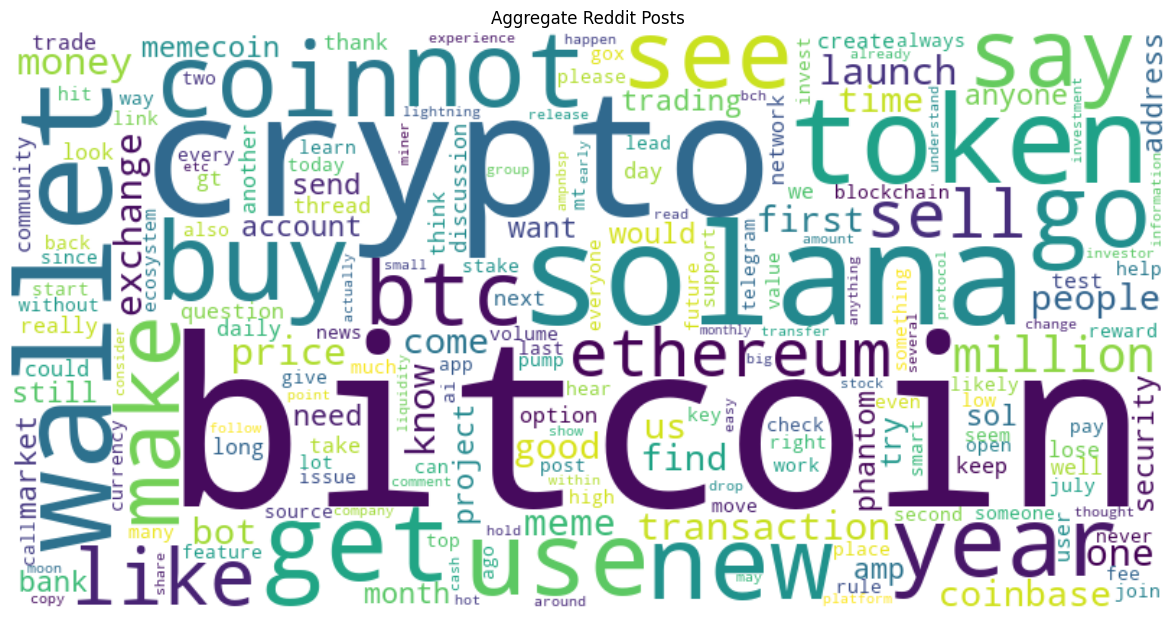

In [73]:
# Only selecting certain dates
all_data = all_data[all_data['date_posted'] >= '2024-07-01']

# Making TF-IDF
# Vectorization
vectorizer = TfidfVectorizer(max_features=200)
X = vectorizer.fit_transform(all_data['text_processed']).toarray()

# Convert to dataframe with the word names as well 
tfidf_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

# Sort the DataFrame columns by their sum in descending order
sorted_columns = tfidf_df.sum().sort_values(ascending=False).index
tfidf_df = tfidf_df[sorted_columns]
tfidf_df.head(5)

# Sum TF-IDF scores for each word across all documents
word_scores = X.sum(axis=0)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary of word scores
word_scores_dict = dict(zip(feature_names, word_scores))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores_dict)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Aggregate Reddit Posts')
plt.show()

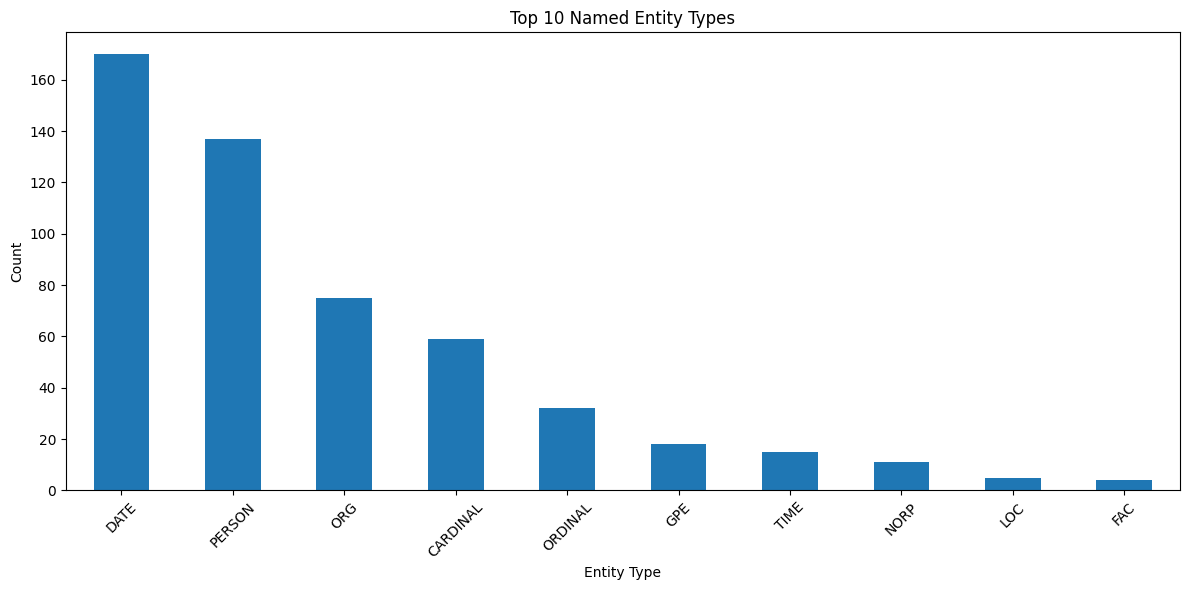

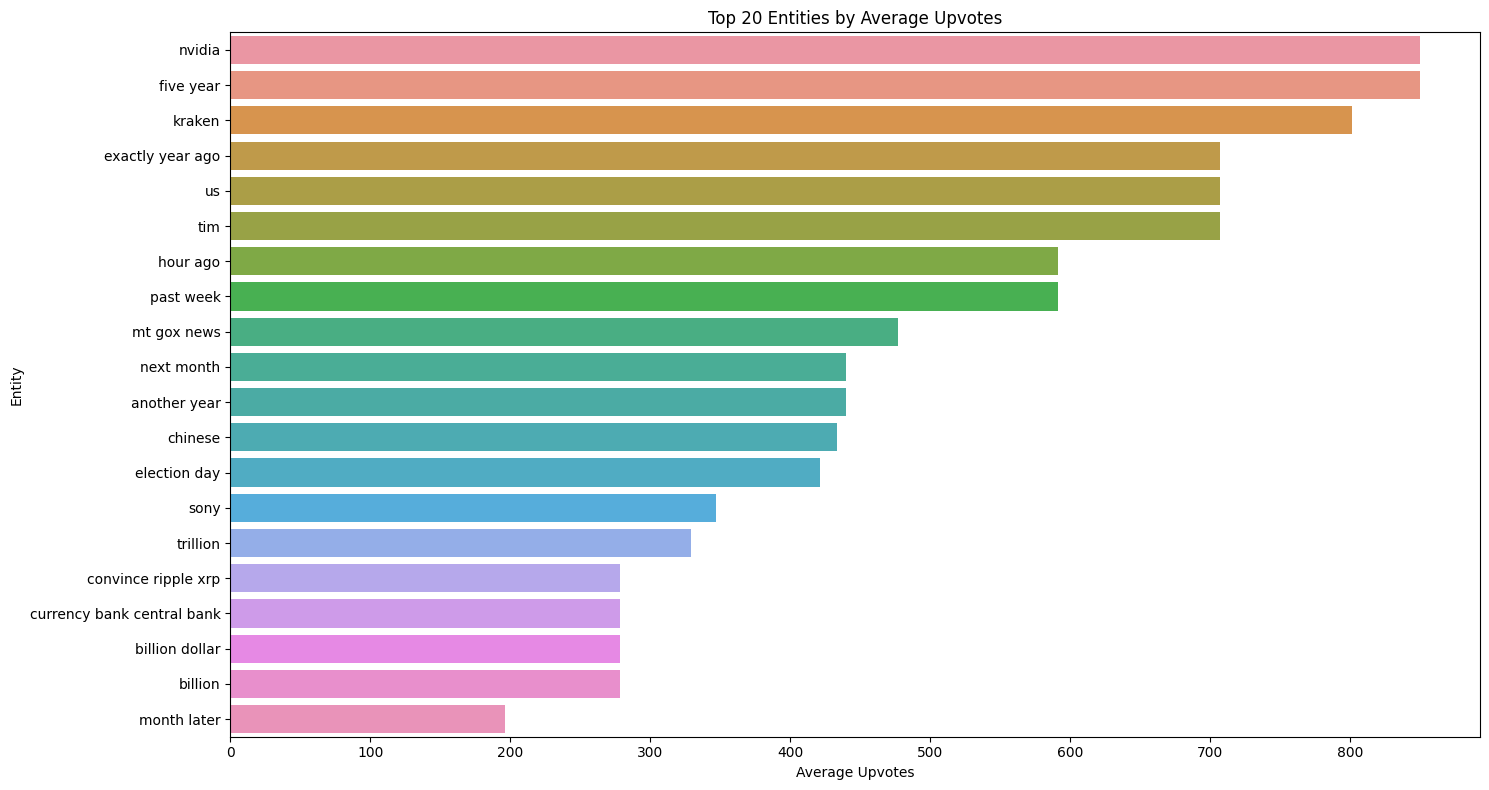

Top 20 Most Important Entities (based on average upvotes):
nvidia: 850.00
five year: 850.00
kraken: 801.00
exactly year ago: 707.00
us: 707.00
tim: 707.00
hour ago: 591.00
past week: 591.00
mt gox news: 477.00
next month: 440.00
another year: 440.00
chinese: 433.00
election day: 421.00
sony: 347.00
trillion: 329.00
convince ripple xrp: 278.00
currency bank central bank: 278.00
billion dollar: 278.00
billion: 278.00
month later: 196.00


In [74]:
ner_data = all_data[all_data['date_posted'] >= '2024-07-01']

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on text
def perform_ner(text):
    doc = nlp(text)
    # Extract named entities and their types
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER function to processed_text column
ner_data['ner_entities'] = ner_data['text_processed'].apply(perform_ner)

# Flatten the list of entities and count their occurrences
all_entities = [entity for sublist in ner_data['ner_entities'] for entity in sublist]
entity_counts = Counter(all_entities)

# Create a DataFrame with entity counts
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count']).reset_index()
entity_df.columns = ['entity', 'count']

# Split the entity into text and label
entity_df[['text', 'label']] = pd.DataFrame(entity_df['entity'].tolist(), index=entity_df.index)

# Group by label and sum the counts
label_counts = entity_df.groupby('label')['count'].sum().sort_values(ascending=False)

# Visualize the top 10 entity types
plt.figure(figsize=(12, 6))
label_counts[:10].plot(kind='bar')
plt.title('Top 10 Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to get average upvotes for each entity
def get_entity_avg_upvotes(row):
    return {entity[0]: row['ups'] for entity in row['ner_entities']}

# Apply the function to each row
ner_data['entity_upvotes'] = ner_data.apply(get_entity_avg_upvotes, axis=1)

# Flatten the dictionary of entity upvotes
entity_upvotes = {}
for d in ner_data['entity_upvotes']:
    for entity, upvotes in d.items():
        if entity in entity_upvotes:
            entity_upvotes[entity].append(upvotes)
        else:
            entity_upvotes[entity] = [upvotes]

# Calculate average upvotes for each entity
entity_avg_upvotes = {entity: sum(upvotes)/len(upvotes) for entity, upvotes in entity_upvotes.items()}

# Create a DataFrame with entity average upvotes
entity_impact_df = pd.DataFrame.from_dict(entity_avg_upvotes, orient='index', columns=['avg_upvotes']).reset_index()
entity_impact_df.columns = ['entity', 'avg_upvotes']

# Sort by average upvotes and get top 20
top_20_entities = entity_impact_df.sort_values('avg_upvotes', ascending=False).head(20)

# Visualize top 20 entities by average upvotes
plt.figure(figsize=(15, 8))
sns.barplot(x='avg_upvotes', y='entity', data=top_20_entities)
plt.title('Top 20 Entities by Average Upvotes')
plt.xlabel('Average Upvotes')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

# Print the top 20 entities with their average upvotes
print("Top 20 Most Important Entities (based on average upvotes):")
for index, row in top_20_entities.iterrows():
    print(f"{row['entity']}: {row['avg_upvotes']:.2f}")

Top topics across all subreddits:
Topic 1: https, bitcoin, com, lightning, token, amp, ai, project, solana, new
Topic 2: solana, gt, https, amp, wallet, png, com, crypto, just, auto
Topic 3: amp, https, discussion, com, reddit, cryptocurrency, www, thread, daily, crypto
Topic 4: bitcoin, buy, btc, price, bch, like, time, people, just, going
Topic 5: btc, crypto, amp, million, bitcoin, new, staking, rewards, binance, buy


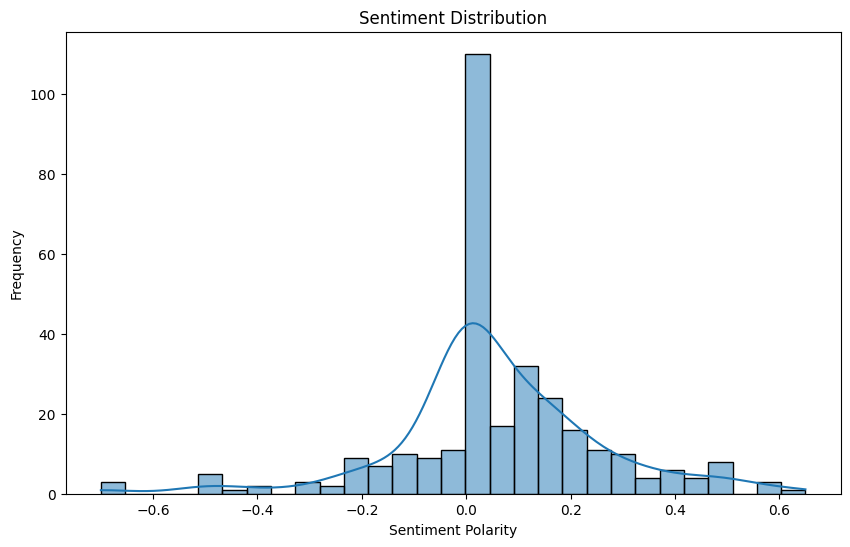

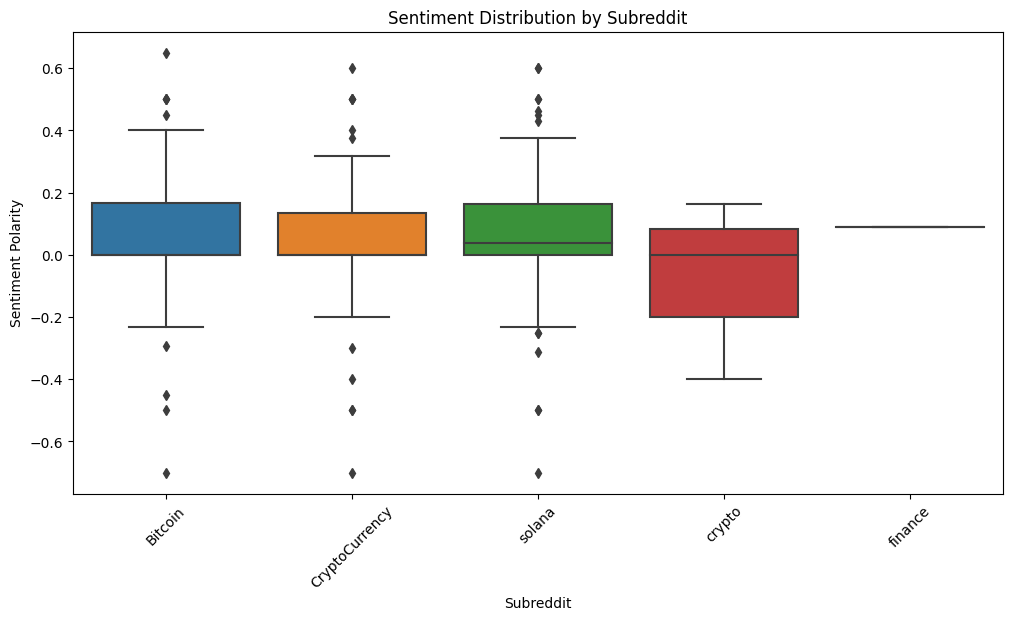

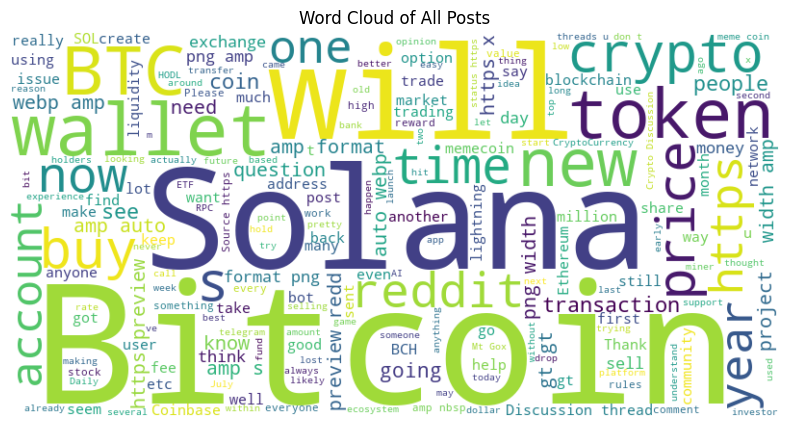


Average sentiment and post score by subreddit:
        subreddit  sentiment         ups
0         Bitcoin   0.067999  107.841584
1  CryptoCurrency   0.050206   79.990196
2          crypto  -0.078559    9.000000
3         finance   0.090000   12.000000
4          solana   0.059845    8.069307


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud

# Assuming you have a DataFrame 'df' with columns: 'subreddit', 'title', 'text', 'score'

# 1. Topic Modeling
def perform_topic_modeling(df, n_topics=5, n_top_words=10):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(df['text'])
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)
    
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# 2. Sentiment Analysis
def analyze_sentiment(df):
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

# 3. Visualizations
def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], kde=True)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

def plot_subreddit_sentiment(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='subreddit', y='sentiment', data=df)
    plt.title('Sentiment Distribution by Subreddit')
    plt.xlabel('Subreddit')
    plt.ylabel('Sentiment Polarity')
    plt.xticks(rotation=45)
    plt.show()

def create_wordcloud(df):
    text = ' '.join(df['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of All Posts')
    plt.show()

# Main execution
if __name__ == "__main__":

    ner_data_a = ner_data
    # Perform topic modeling
    print("Top topics across all subreddits:")
    perform_topic_modeling(ner_data_a)
    
    # Analyze sentiment
    ner_data_a = analyze_sentiment(ner_data_a)
    
    # Create visualizations
    plot_sentiment_distribution(ner_data_a)
    plot_subreddit_sentiment(ner_data_a)
    create_wordcloud(ner_data_a)
    
    # Additional analysis: Average sentiment and post score by subreddit
    subreddit_stats = ner_data_a.groupby('subreddit').agg({
        'sentiment': 'mean',
        'ups': 'mean'
    }).reset_index()
    
    print("\nAverage sentiment and post score by subreddit:")
    print(subreddit_stats)

Columns in the DataFrame:
text                      object
ups                        int64
date_posted       datetime64[ns]
subreddit                 object
score                      int64
text_processed            object
ner_entities              object
entity_upvotes            object
sentiment                float64
dtype: object

First few rows of the DataFrame:
                                                text   ups date_posted  \
1  Daily Discussion, July 04, 2024 Please utilize...    27  2024-07-04   
2                                            Weeeee   1348  2024-07-04   
3                           This is peak idiocracy.    207  2024-07-04   
4  I found this old meme. 11,600$ was supposed to...   156  2024-07-04   
5  All you need to know in one headline… Don’t be...    86  2024-07-04   

  subreddit  score                                     text_processed  \
1   Bitcoin     27  daily discussion july please utilize sticky th...   
2   Bitcoin   1348                    

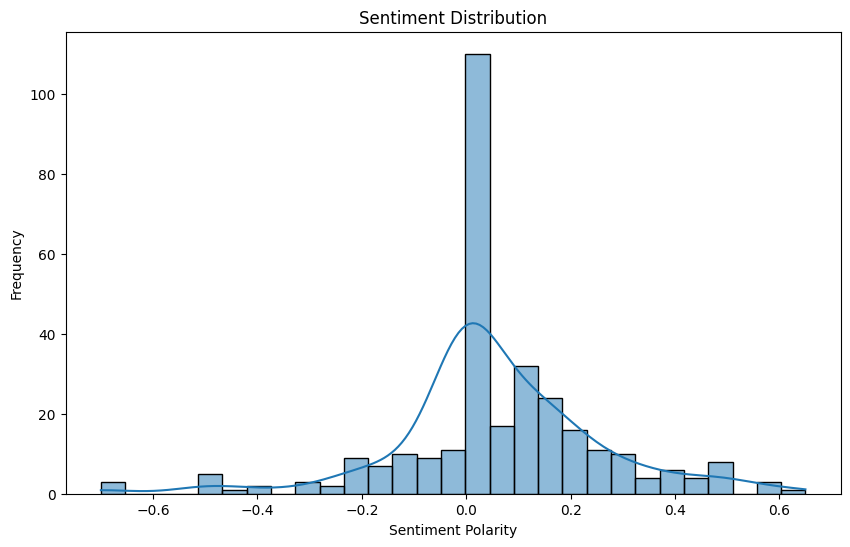

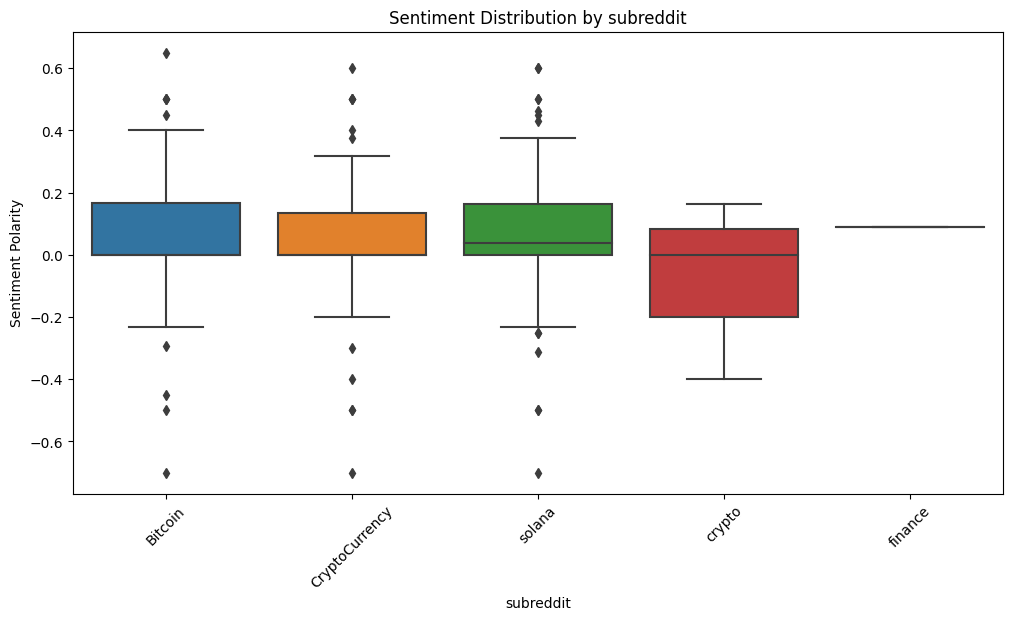

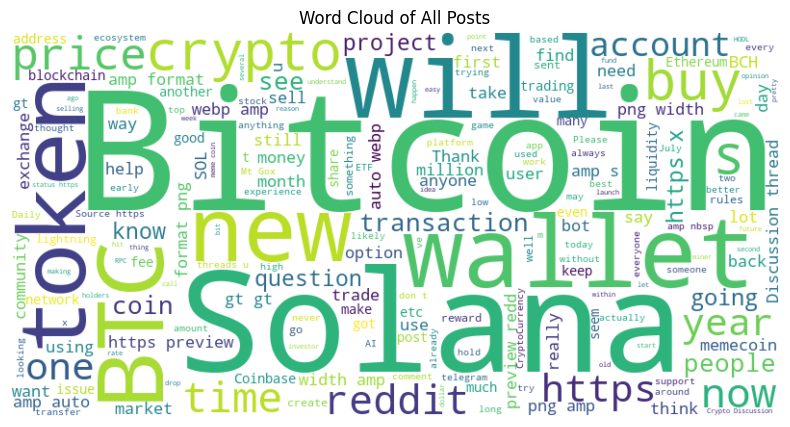

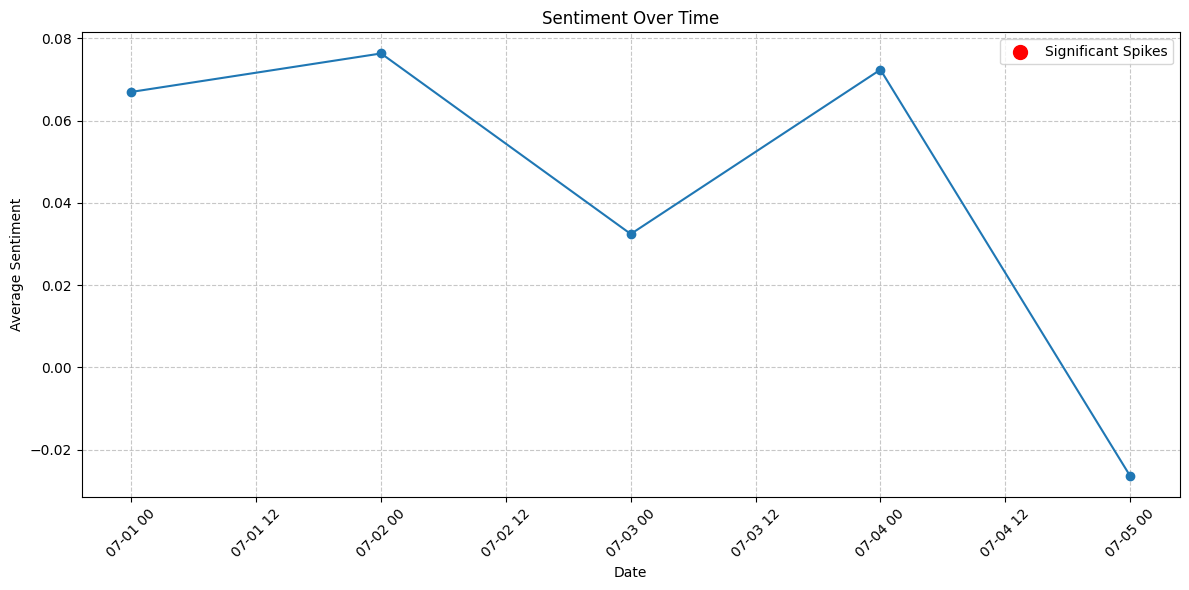


Average sentiment and post score by subreddit:
        subreddit  sentiment       score
0         Bitcoin   0.067999  107.841584
1  CryptoCurrency   0.050206   79.990196
2          crypto  -0.078559    9.000000
3         finance   0.090000   12.000000
4          solana   0.059845    8.069307


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud

def perform_topic_modeling(df, text_column, n_topics=5, n_top_words=10):
    # Ensure we have string data
    df[text_column] = df[text_column].astype(str)
    
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(df[text_column])
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)
    
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

def analyze_sentiment(df, text_column):
    df['sentiment'] = df[text_column].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], kde=True)
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

def plot_category_sentiment(df, category_column):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category_column, y='sentiment', data=df)
    plt.title(f'Sentiment Distribution by {category_column}')
    plt.xlabel(category_column)
    plt.ylabel('Sentiment Polarity')
    plt.xticks(rotation=45)
    plt.show()

def create_wordcloud(df, text_column):
    text = ' '.join(df[text_column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of All Posts')
    plt.show()

def plot_sentiment_over_time(df, date_column):
    # Convert date column to datetime if it's not already
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Group by date and calculate mean sentiment
    daily_sentiment = df.groupby(df[date_column].dt.date)['sentiment'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sentiment[date_column], daily_sentiment['sentiment'], marker='o')
    plt.title('Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Highlight significant spikes
    threshold = daily_sentiment['sentiment'].std() * 2
    spikes = daily_sentiment[abs(daily_sentiment['sentiment']) > threshold]
    plt.scatter(spikes[date_column], spikes['sentiment'], color='red', s=100, zorder=5, label='Significant Spikes')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Use the correct DataFrame name
    df = ner_data_a
    
    # Print column names and data types for debugging
    print("Columns in the DataFrame:")
    print(df.dtypes)
    print("\nFirst few rows of the DataFrame:")
    print(df.head())
    
    # Identify text, category, and date columns
    text_column = 'text' if 'text' in df.columns else df.columns[0]
    category_column = 'subreddit' if 'subreddit' in df.columns else None
    date_column = next((col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()), None)
    
    print(f"\nUsing '{text_column}' as the text column.")
    if category_column:
        print(f"Using '{category_column}' as the category column.")
    else:
        print("No category column found. Some analyses will be skipped.")
    if date_column:
        print(f"Using '{date_column}' as the date column.")
    else:
        print("No date column found. Time-based analysis will be skipped.")
    
    # Perform topic modeling
    print("\nTop topics across all posts:")
    perform_topic_modeling(df, text_column)
    
    # Analyze sentiment
    df = analyze_sentiment(df, text_column)
    
    # Create visualizations
    plot_sentiment_distribution(df)
    if category_column:
        plot_category_sentiment(df, category_column)
    create_wordcloud(df, text_column)
    
    # Time-based sentiment analysis
    if date_column:
        plot_sentiment_over_time(df, date_column)
    
    # Additional analysis
    if category_column:
        category_stats = df.groupby(category_column).agg({
            'sentiment': 'mean',
            'score': 'mean' if 'score' in df.columns else None
        }).reset_index()
        
        print(f"\nAverage sentiment and post score by {category_column}:")
        print(category_stats)
    else:
        print("\nOverall sentiment statistics:")
        print(df['sentiment'].describe())

if __name__ == "__main__":
    main()